# EDA on Data Science Job Salaries

## About the dataset
The Data Science Job Salaries Dataset contains 11 columns, each are:

| Column Name | Description   |
|------|:------|
|   work_year  | The year the salary was paid.|
|   experience_level  | The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director|
|   employment_type  | The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance.|
|   job_title  | The role worked in during the year.|
|   salary  | The total gross salary amount paid.|
|   salary_currency  | The currency of the salary paid as an ISO 4217 currency code.|
|   salaryinusd  | The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).|
|   employee_residence  | Employee's primary country of residence in during the work year as an ISO 3166 country code.|
|   remote_ratio  | The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)|
|   company_location  | The country of the employer's main office or contracting branch as an ISO 3166 country code.|
|   company_size  | The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)|

## Objectives
1. Overview of every features in the dataset
2. Salaries analysis
3. Coconut

## Table of Contents
* [1. Import libraries](#import)
* [2. Univariate Analysis](#univariate)
    * [2.1 Categorical Columns](#Categorical)
        * [2.1.1 Job Titles](#JobTitles)
        * [2.1.2 Experience Level](#ExperienceLevel)
        * [2.1.3 Employment Type](#EmploymentType)
        * [2.1.4 Employee Residence & Company Location](#EmployeeResidence&CompanyLocation)
        * [2.1.5 Company Size](#CompanySize)
    * [2.2 Numerical Columns](#Numerical)
        * [2.2.1 Salary in USD](#SalaryinUSD)
        * [2.2.2 Work Year](#WorkYear)
        * [2.2.3 Remote Ratio](#RemoteRatio)
* [3. Salaries Analysis](#SalariesAnalysise)

# 1. Import libraries<a class="anchor" id="import"></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

In [2]:
#read dataset, remove first column as it's useless
df = pd.read_csv("ds_salaries.csv", index_col=0)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [23]:
#total number of rows and columns
df.shape

(607, 11)

In [3]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [4]:
#check for null values
df.isnull().values.any()

False

# 2. Univariate Analysis<a class="anchor" id="univariate"></a>

## 2.1 Categorical Columns<a class="anchor" id="Categorical"></a>

### 2.1.1 Job Titles<a class="anchor" id="JobTitles"></a>

### 2.1.2 Experience Level<a class="anchor" id="ExperienceLevel"></a>

### 2.1.3 Employment Type<a class="anchor" id="EmploymentType"></a>

### 2.1.4 Employee Residence & Company Location<a class="anchor" id="EmployeeResidence&CompanyLocation"></a>

### 2.1.5 Company Size<a class="anchor" id="JobTitles"></a>

## 2.2 Numerical Columns<a class="anchor" id="Numerical"></a>

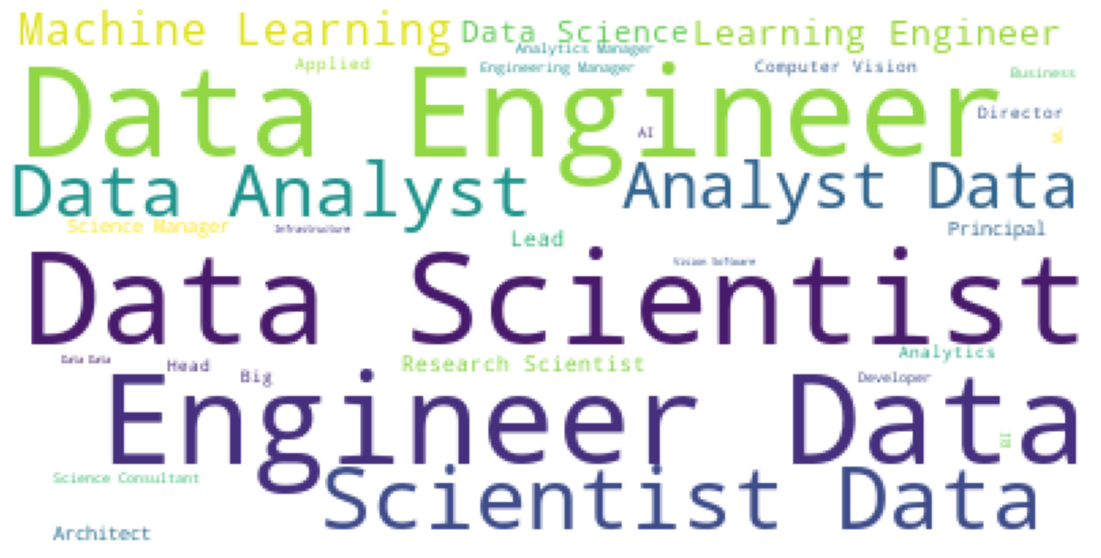

In [26]:
#See what kinds of job titles here we have
#df.job_title.value_counts()
wordCloud = WordCloud(
    background_color='white',
    max_font_size = 50).generate(' '.join(df.job_title))

plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(wordCloud)
plt.show()

<AxesSubplot:>

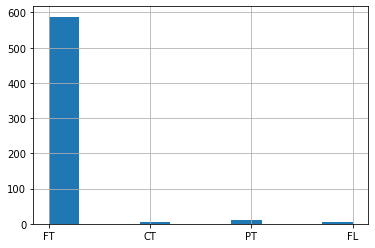

In [13]:
#employment_type
df.employment_type.hist()

<AxesSubplot:>

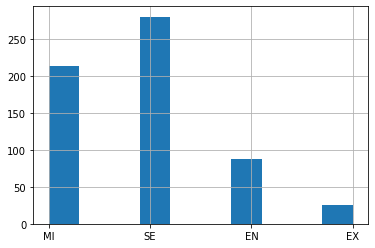

In [7]:
#Numbers the levels of jobs 
df.experience_level.hist()

In [8]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


<AxesSubplot:>

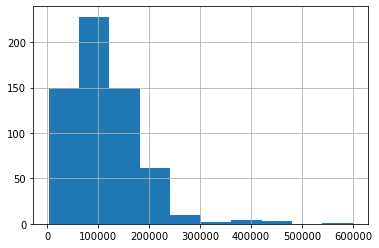

In [9]:
#Looking at salaries in USD
df.salary_in_usd.hist()

In [19]:
#Correlation between each quantative columns
#pd.set_option('display.max_rows', None)
pd.pivot_table(df, index = ['employee_residence', 'job_title'], aggfunc={'salary_in_usd':np.mean}).sort_values('employee_residence', ascending = 'False')

salary_in_usd
employee_residence job_title                                              
AE                 Lead Data Scientist                       115000.000000
                   Machine Learning Engineer                  92500.000000
AR                 Data Science Engineer                      60000.000000
AT                 Data Engineer                              74130.000000
                   Data Scientist                             91237.000000
                   Research Scientist                         64849.000000
AU                 Computer Vision Software Engineer         150000.000000
                   Data Scientist                             86703.000000
                   Machine Learning Engineer                  87425.000000
BE                 Machine Learning Engineer                  85699.000000
BG                 Data Analyst                               80000.000000
BO                 Applied Machine Learning Scientist         75000.000000
BR                 AI Scientist                               12000.000000
                   Cloud Data Engineer                       160000.000000
                   Computer Vision Engineer                   21453.500000
                   Data Scientist                             56450.500000
CA                 Research Scientist                        115788.333333
                   Principal Data Analyst                     75000.000000
                   Machine Learning Manager                  117104.000000
                   Machine Learning Developer                 78791.000000
                   Lead Data Engineer                        118187.000000
                   Director of Data Science                  196979.000000
                   Data Science Engineer                     127221.000000
                   Data Architect                            141550.000000
                   Data Analyst                               81487.333333
                   Business Data Analyst                      70912.000000
                   Big Data Architect                         99703.000000
                   Data Scientist                             81489.166667
CH                 Data Scientist                            122346.000000
CL                 Data Scientist                             40038.000000
CN                 Machine Learning Engineer                  43331.000000
CO                 Machine Learning Engineer                  21844.000000
CZ                 Research Scientist                         69999.000000
DE                 Lead Machine Learning Engineer             87932.000000
                   ML Engineer                                15966.000000
                   Principal Data Scientist                  161565.666667
                   Director of Data Science                  135936.000000
                   Machine Learning Engineer                  59693.500000
                   Data Scientist                             74773.714286
                   Computer Vision Software Engineer          95746.000000
                   Data Engineering Manager                   59303.000000
                   Data Engineer                              59985.000000
                   Data Analytics Engineer                    79197.000000
                   Data Analyst                               63831.000000
                   Data Science Consultant                    72499.000000
DK                 Computer Vision Engineer                   28609.000000
                   AI Scientist                               45896.000000
DZ                 Data Scientist                            100000.000000
EE                 Head of Data                               32974.000000
ES                 AI Scientist                               55000.000000
                   Big Data Engineer                          60000.000000
                   Data Analyst                               29098.000000
           

In [22]:
#
#pd.pivot_table(df[df.job_title == 'Data Scientist'], index = ['employee_residence'], aggfunc={'salary_in_usd':np.mean}).sort_values('employee_residence', ascending = 'False')

# Univariate Analysis